# Исследование стартапов

### Структура проекта:
1. [Знакомство с данными: загрузка и первичная предобработка](#data)
2. [Предобработка данных, предварительное исследование](#data_new)
3. [Исследовательский анализ объединённых таблиц](#analysing)
4. [Итоговый вывод и рекомендации](#conclusion)


## 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno

In [2]:
PATH = "https://code.s3.yandex.net/datasets/"
acquisition_df = pd.read_csv(PATH +'acquisition.csv')
company_df = pd.read_csv(PATH +'company_and_rounds.csv')
people_df = pd.read_csv(PATH +'people.csv')
education_df = pd.read_csv(PATH +'education.csv')
degrees_df = pd.read_csv(PATH +'degrees.csv')

In [3]:
display(acquisition_df.head(5))
display(acquisition_df.info())

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

Нужно изменить тип данных столбца `acquired_at`. Есть пропуски в столбцах `term_code`, `acquired_at`.

In [4]:
display(company_df.head(5))
display(company_df.info())

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

Нужно изменить названия столбцов, во многих столбцах много пропусков. Изменить тип данных с датами в столбцах `founded  at`, `closed  at`, `funded  at`. Можно оптимизировать типы данных в столбцах `is  last  round`, `is  first  round`, `participants`, `pre  money  valuation`. Столбцы `company  ID` и `company  id` дублируются.

In [5]:
#Меняем названия столбцов в датасете company_df
company_df.rename(columns={
    'company  ID': 'company_id',
    'name': 'name',
    'category  code': 'category_code',
    'status': 'status',
    'founded  at': 'founded_at',
    'closed  at': 'closed_at',
    'domain': 'domain',
    'network  username': 'network_username',
    'country  code': 'country_code',
    'investment  rounds': 'investment_rounds',
    'funding  rounds': 'funding_rounds',
    'funding  total': 'funding_total',
    'milestones': 'milestones',
    'funding  round  id': 'funding_round_id',
    'company  id': 'company_id_copy',  #Переименовали, чтобы отличать от первого company_id
    'funded  at': 'funded_at',
    'funding  round  type': 'funding_round_type',
    'raised  amount': 'raised_amount',
    'pre  money  valuation': 'pre_money_valuation',
    'participants': 'participants',
    'is  first  round': 'is_first_round',
    'is  last  round': 'is_last_round'
}, inplace=True)  
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_copy', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

In [6]:
display(people_df.head(5))
display(people_df.info())

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

В столбцах `company_id`, `network_username` много пропусков. 

In [7]:
display(education_df.head(5))
display(education_df.info())

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

Столбец `graduated_at` нужно привести к другому типу данных. Также есть пропуски в данных.

In [8]:
display(degrees_df.head(5))
display(degrees_df.info())

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

Есть пропуски в столбцах `subject`, `degree_type`.

### 1.2. Смена типов и анализ пропусков

In [9]:
#Меняем типы данных в столбцах, которые хранят значения даты и времени
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')
company_df['founded_at'] = pd.to_datetime(company_df['founded_at'], errors='coerce')
company_df['closed_at'] = pd.to_datetime(company_df['closed_at'], errors='coerce')
company_df['funded_at'] = pd.to_datetime(company_df['funded_at'], errors='coerce')
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')
#Оптимизируем типы данных в датасете company_df
for column in ['pre_money_valuation','participants', 'is_first_round', 'is_last_round']: 
    company_df[column] = pd.to_numeric(company_df[column],downcast='float')

Данные не полные, присутствует много пропусков. Поэтому в процессе исследования нужно обратить внимание на возможные искажения.

<AxesSubplot:>

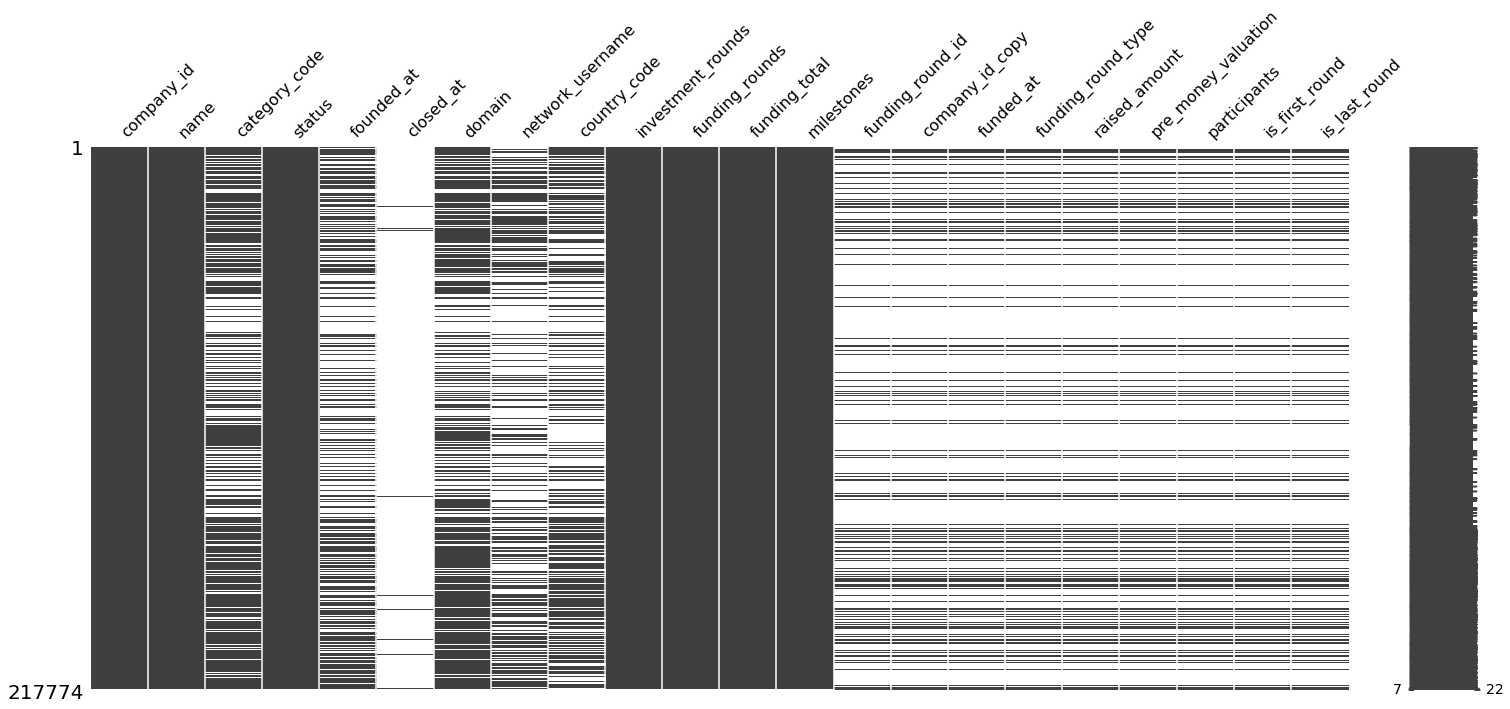

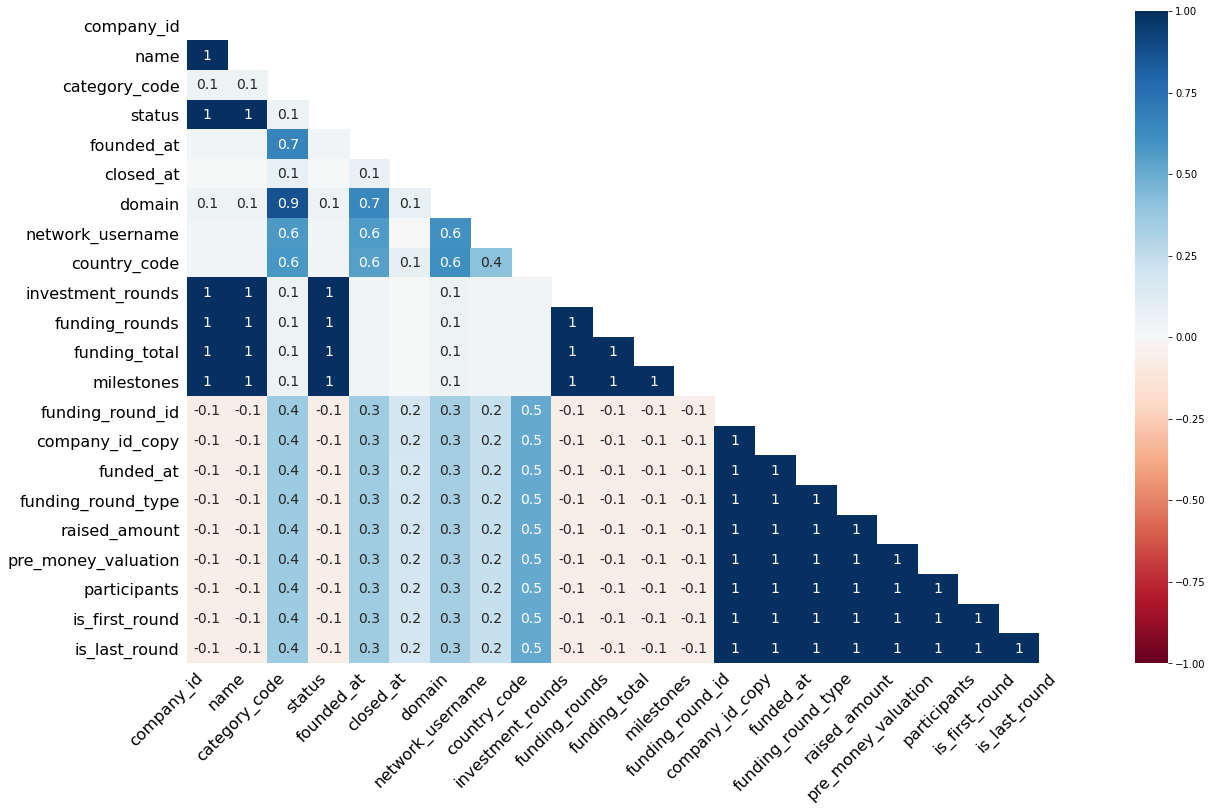

In [10]:
msno.matrix(company_df)
msno.heatmap(company_df)

Пропуски в столбце `category_code`, `founded_at` скорее всего относятся к виду MCAR. Пропуски в столбце `closed_at` возможно из-за того, что компании еще функционируют (вид MAR). Пропуски в `domain`,`network_username` возможно у компании нет своих сайтов, или нет информации о них. (вид MNAR) Пропуски в  `country_code` - вид MCAR. Наибольшее количество пропусков в столбцах: `funding_round_id`,	`company_id_copy`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`, `funded_year`. Все они связаны с информацией о раундах финансирования. На тепловой карте видна корелляция всех этих столбцов с данными столбца `funding_round_id`. Отсутствие информации в `funding_round_id`, приводит к отсутствию дополнительной информации о финансировании, описываемой в столбцах  `company_id_copy`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`, `funded_year`. Таким образом, пропуски в `funding_round_id` относятся к виду MCAR, пропуски в столбцах `company_id_copy`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`, `funded_year` отностятся к виду MAR, так как зависят от столбца `funding_round_id`.

## 2. Предобработка данных, предварительное исследование
<a id='data_new'></a>


### 2.1. Раунды финансирования по годам

In [11]:
#Строим сводную таблицу
company_df['funded_year'] = company_df['funded_at'].dt.year #Выделяем год из даты
table = (
    company_df.groupby('funded_year').agg(
        typical_raised_amount=('raised_amount', lambda x: np.median(x)),  #Медиана raised_amount
        total_rounds=('raised_amount', 'count')  #Общее количество раундов
    ).reset_index())
table = table[table['total_rounds'] > 50]
print(table)

    funded_year  typical_raised_amount  total_rounds
15       1999.0              2000000.0            76
16       2000.0              4200000.0           125
17       2001.0              3000000.0            96
18       2002.0              4200000.0           116
19       2003.0              3000000.0           159
20       2004.0              5000000.0           291
21       2005.0              5500000.0          1633
22       2006.0              5000000.0          2436
23       2007.0              3973320.0          3279
24       2008.0              3110000.0          3774
25       2009.0              2000000.0          4151
26       2010.0              1602500.0          6221
27       2011.0              1200000.0          9204
28       2012.0              1000000.0          9970
29       2013.0              1200000.0         11072


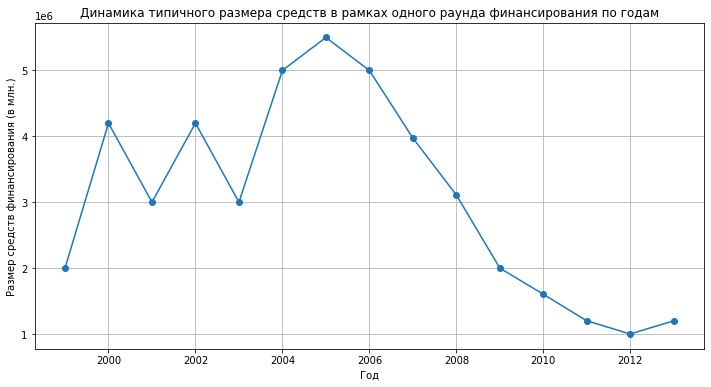

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(table['funded_year'], table['typical_raised_amount'], marker='o')
plt.title('Динамика типичного размера средств в рамках одного раунда финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Размер средств финансирования (в млн.)')
plt.grid(True)
plt.show()

В 2005 году размер средств финансирования был максимальным и составил 5 500 000, количество раундов - 1633. В 2013 количество раундов составило 11072 - максимальное число раундов, при этом размер выделяемых в рамках каждого раунда средств составил всего 1 200 000. Минимальный размер финансирования был в 2012 году - 1 000 000.


### 2.2. Сотрудники и их образование

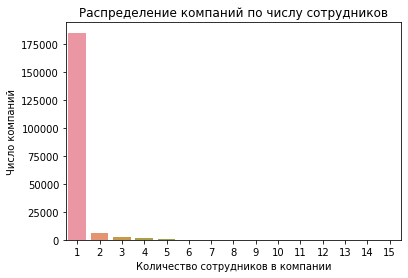

In [13]:
company_sizes = company_df['company_id'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=company_sizes)
plt.xlabel('Количество сотрудников в компании')
plt.ylabel('Число компаний')
plt.title('Распределение компаний по числу сотрудников')
plt.show()

Добавление degrees_df дублирует строки если один человек имеет несколько степеней, поэтому лучше обойтись без присоединения этой таблицы. Согласно графику выше о распределении компаний по числу сотрудников, очень много компаний с небольшим количеством сотрудников и небольшое количество крупных, поэтому при выборе границ групп выберем значения поменьше. По данным ниже видно, что в компаниях с меньшим размером - 1-25, средняя доля сотрудников, с отсутвующими данными об образовании приблизительно одинакова — от 45% до 53%. А в компаниях с 26+ сотрудниками доля резко падает до 26.7%. Значит, чем крупнее компания, тем полнее сведения о сотрудниках.

In [14]:
#Объединяем датасеты
people_df = people_df.rename(columns={'id': 'person_id'})
edu_merged = people_df.merge(education_df, on='person_id', how='left')
#Сотрудники без образования
edu_merged['no_education'] = edu_merged['instituition'].isna()
#Только уникальные сотрудники
unique_people = edu_merged.drop_duplicates(subset='person_id')
#Группируем по company_id
company_stats = unique_people.groupby('company_id').agg(
    total_employees=('person_id', 'count'),
    employees_without_edu=('no_education', 'sum')
)
#Доля сотрудников без образования
company_stats['share_without_edu'] = company_stats['employees_without_edu'] / company_stats['total_employees']
#Категории размеров компаний
bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
company_stats['company_size'] = pd.cut(company_stats['total_employees'], bins=bins, labels=labels, right=True)
#Средняя доля сотрудников без образования
no_edu_share = company_stats.groupby('company_size')['share_without_edu'].mean().reset_index()
print(no_edu_share)

  company_size  share_without_edu
0            1           0.463127
1            2           0.466962
2            3           0.487875
3          4-5           0.497962
4         6-10           0.531828
5        11-25           0.459660
6          26+           0.266928


In [15]:
print(people_df['network_username'].value_counts().head(10))  # топ-10 повторов внутри датасета
print(company_df['network_username'].value_counts().head(10))

iWatchLife         6
chrislogan         5
ConnectAndSell     4
firstscribe        4
gmrtranscripts     3
bubblehubdotcom    3
edsdru             3
osiaffiliate       3
xorduna            3
PepitaStore        3
Name: network_username, dtype: int64
Goodman_UK      20
IndiaMART       17
mobivery        15
tyropayments    15
AviirLabs       14
solarcity       13
network         13
InstaMed        13
TeleComSys      13
GalectinGALT    13
Name: network_username, dtype: int64


Cтолбец `network_username` встречается в таблицах `people_df` и `company_df`. В таблице `company_df` столбец предствляет собой  ник компании в сети. В таблице `people_df` столбец представляет собой ник сотрудника в социальных сетях. Поэтому данные в этих столбцах совершенно разные и объединять по ним не стоит.

Количество пересечений `network_username` между двумя таблицами составил 2199. Среди них доля пересечения от таблицы people: 0.057, от company_and_rounds: 0.028. Процент пересечения составляет лишь 5.7% и 2.8%, поэтому использование `network_username` для объединения данных между `people` и `company_and_rounds` не подходит.

Количество пересечений network_username: 2199
Доля пересечения от people: 0.057
Доля пересечения от company_and_rounds: 0.028


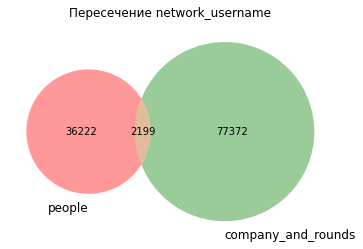

In [16]:
#Уникальные значения network_username из двух таблиц
people_usernames = set(people_df['network_username'].dropna().unique())
company_usernames = set(company_df['network_username'].dropna().unique())
#Пересечение
shared_usernames = people_usernames & company_usernames
#Количество пересечений
n = len(shared_usernames)
n_people = len(people_usernames)
n_company = len(company_usernames)
print(f'Количество пересечений network_username: {n}')
print(f'Доля пересечения от people: {n / n_people:.2}')
print(f'Доля пересечения от company_and_rounds: {n / n_company:.2}')
#Строим визуализацию
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2([people_usernames, company_usernames], 
      set_labels=('people', 'company_and_rounds'))

plt.title('Пересечение network_username')
plt.show()


### 2.4. Анализ пропусков

Для представления информации более удобным для исследования образом, разделим датасет  `company_and_rounds.csv` на 2 меньшие таблицы `companies` и `rounds`.

In [17]:
companies = company_df[[
    'company_id', 'name', 'status', 'category_code', 'founded_at',
    'closed_at', 'country_code', 'domain', 'network_username',
    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'
]].drop_duplicates(subset='company_id')
rounds = company_df[[
    'company_id', 'funding_round_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants',
    'is_first_round', 'is_last_round'
]].dropna(subset=['funding_round_id'])
companies.info()
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   status             196553 non-null  object        
 3   category_code      123186 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   country_code       87990 non-null   object        
 7   domain             126545 non-null  object        
 8   network_username   80591 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)



## 3. Исследовательский анализ объединённых таблиц
<a id='analysing'></a>


### 3.1. Объединение данных

In [18]:
df_merged = companies.merge(acquisition_df, left_on='company_id', right_on='acquired_company_id', how='outer')
df= df_merged [(df_merged['funding_rounds'] > 0)|(df_merged['investment_rounds'] > 0)|(df_merged['status']== 'acquired')]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   status                40890 non-null  object        
 3   category_code         35436 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   country_code          34858 non-null  object        
 7   domain                35883 non-null  object        
 8   network_username      20938 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id             

Объединили отфильтрованный датасет `companies` и таблицу `acquisition_df`. В получившейся таблице вышло 40890 строк и 19 столбцов. Также присутствует много пропусков.

In [19]:
print(df['funding_total'].describe())

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64


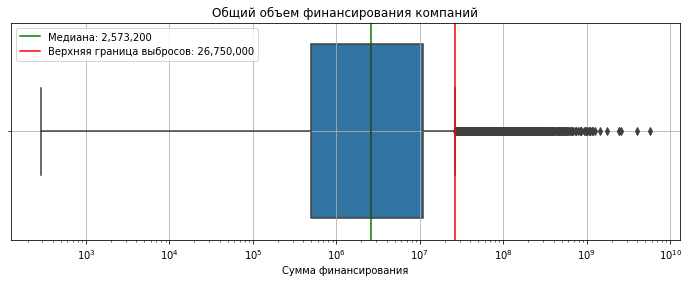

In [20]:
funding_data = df['funding_total'].dropna()
funding_data = funding_data[funding_data > 0]

# Рассчёт статистик
Q1 = np.percentile(funding_data, 25)
Q3 = np.percentile(funding_data, 75)
IQR = Q3 - Q1
median = np.median(funding_data)
lower = Q1 - 1.5 * IQR
lower = max(0, lower)
upper = Q3 + 1.5 * IQR
#Строим ящик с усами
plt.figure(figsize=(12, 4))
sns.boxplot(x=funding_data)
plt.xscale('log')
plt.title('Общий объем финансирования компаний')
plt.xlabel('Сумма финансирования')
plt.grid(True)

# Добавим линии и подписи
plt.axvline(median, color='green', label=f'Медиана: {median:,.0f}')
plt.axvline(upper, color='red', label=f'Верхняя граница выбросов: {upper:,.0f}')

plt.legend()
plt.show()

Показатели, возвращаемые методом .describe() плохо подходят для нахождения типичных значений из-за большого разброса данных. Среднее и стандартное отклонение мало информативны, так как данные имеют сильную положительную асимметрию. Для таких данных лучше использовать медиану и интерквартильный размах (IQR) как меры типичного значения и разброса. На графике более заметно, что типичной ценой(медианой) является значение 2 573 200. Верхняя граница выбросов: 26 750 000, все суммы выше - это выбросы.


### 3.3. Верхняя и нижняя граница выбросов

In [21]:
filtered_companies = df[(df['price_amount'].isin([0, 1])) & (df['funding_total'] > 0)]

print(f"Число компаний: {filtered_companies.shape[0]}")
display(filtered_companies.head())

Число компаний: 1618


,company_id,name,status,category_code,founded_at,closed_at,country_code,domain,network_username,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
66,10054.0,Jumptap,acquired,mobile,2005-01-01,NaT,USA,jumptap.com,jumptap,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
170,101312.0,SideTour,acquired,web,2011-06-01,NaT,USA,sidetour.com,sidetour,0.0,3.0,4000000.0,2.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
177,101340.0,ChoicePass,acquired,enterprise,2011-07-01,NaT,USA,choicepass.com,choicepass,0.0,1.0,250000.0,1.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
181,10137.0,Producteev,acquired,software,2008-07-08,NaT,USA,producteev.com,producteev,0.0,3.0,1310000.0,2.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
184,10139.0,TradeCard,acquired,enterprise,1999-01-01,NaT,USA,tradecard.com,TradeCard,0.0,2.0,44925000.0,1.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01


In [22]:
print(f"25-й перцентиль: {Q1:,.0f}")
print(f"75-й перцентиль: {Q3:,.0f}")
print(f"IQR: {IQR:,.0f}")
print(f"Нижняя граница выбросов: {lower:,.0f}")
print(f"Верхняя граница выбросов: {upper:,.0f}")

25-й перцентиль: 500,000
75-й перцентиль: 11,000,000
IQR: 10,500,000
Нижняя граница выбросов: 0
Верхняя граница выбросов: 26,750,000


In [23]:
lower_percentile = np.sum(funding_data <= lower) / len(funding_data) * 100
upper_percentile = np.sum(funding_data >= upper) / len(funding_data) * 100

print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных")
print(f"Верхняя граница соответствует {100 - upper_percentile:.2f}% данных")

Нижняя граница соответствует 0.00% данных
Верхняя граница соответствует 87.53% данных


Число компаний, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования составил 1618. 25-й перцентиль: 500,000. 75-й перцентиль: 11,000,000. IQR: 10,500,000. Нижняя граница выбросов соответствует 0.00% данных. Верхняя граница соответствует 87.53% данных.


### 3.4. Цены стартапов по категориям

In [24]:
df_filtered = df[
    (df['price_amount'].notnull()) &
    (df['price_amount'] > 0) &
    (df['category_code'].notnull())
]

grouped = (
    df_filtered.groupby('category_code')['price_amount']
    .agg(
        count='count',
        median='median',
        std='std',
        iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
    ).reset_index()
)

grouped = grouped[grouped['count'] >= 10]
grouped['score'] = grouped['median'].rank(ascending=False) + grouped['std'].rank(ascending=False)
top5 = grouped.sort_values('score').head(5)

print(top5)


       category_code  count       median           std           iqr  score
3            biotech    263  200000000.0  1.968195e+09  4.690000e+08    6.0
26  public_relations     74  110000000.0  6.854338e+09  3.893750e+08   10.0
13            health     10  140000000.0  1.927100e+09  3.135000e+08   12.0
16     manufacturing     21  351000000.0  1.060435e+09  1.240000e+09   12.0
29          security     36  164500000.0  1.378442e+09  4.462500e+08   12.0


Advertising лидирует в рейтинге за счёт высокой медианы и большого количества сделок. Finance — меньший объём сделок, но очень большой разброс цен. News — самая высокая медианная цена среди топ-5, но при этом небольшое количество сделок. Web и hardware — средние значения по медиане, но стабильные показатели и значительный объём сделок. Был выбран топ-5, потому что можно сосредоточиться на наиболее заметных категориях (не слишком много), удобно для анализа. Баланс между медианой (типичной ценой) и стандартным отклонением помогает выделить категории с типично высокими ценами и значительным разбросом.


### 3.5. Сколько раундов продержится стартап перед покупкой

In [25]:
rounds_by_status = df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)
print(rounds_by_status)

status
ipo          1.934375
operating    1.522658
closed       1.381453
acquired     0.525532
Name: funding_rounds, dtype: float64


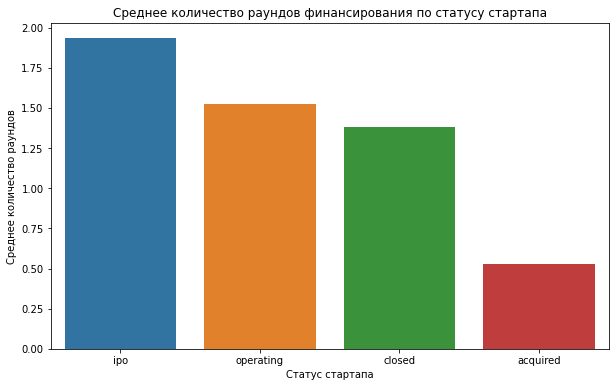

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=rounds_by_status.index, y=rounds_by_status.values)
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.ylabel('Среднее количество раундов')
plt.xlabel('Статус стартапа')
plt.show()

IPO  — стартапы, которые вышли на биржу, в среднем проходили около 2 раундов финансирования. Это значит для выхода им требуется более серьёзная подготовка и несколько этапов привлечения капитала. Operating — активные компании, которые продолжают развиваться, имеют в среднем чуть меньше 2 раундов. Значит, многие из них либо недавно начали развиваться, либо некоторые в процессе подготовки к следующим раундам. Closed — компании, которые закрылись, имеют среднее число раундов около 1.4. Некоторые могли закрыться очень рано, после первого финансирования, другие — позже. Acquired (поглощённые) — в среднем имеют меньше раундов (около 0.5). Это может означать, что такие стартапы часто покупают очень рано, возможно, на ранних стадиях или даже без полноценного раунда.


## 4. Итоговый вывод и рекомендации
<a id='conclusion'></a>

В ходе проекта были проанализированы и подготовлены датасеты: acquisition.csv, company_and_rounds.csv, people.csv, education.csv, degrees.csv. Обработали типы данных в столбцах дат и времени, проанализированы пропуски. Объединили данные для ответа на вопросы заказчика. Были проанализированы выбросы и типичные значения сумм финансирования. Были исследованы компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Рассчитали аналитически верхнюю и нижнюю границу выбросов для столбца funding_total. Среди категорий стартапов выделили топ-5 категорий стартапов, характеризующиеся, типично высокими ценами и наибольшим разбросом цен за стартап. 

По итогам исследования, данные не полные, присутствует много пропусков. Поэтому в процессе исследования нужно обратить внимание на возможные искажения. 

В 2005 году размер средств финансирования был максимальным и составил 5 500 000, количество раундов - 1633. В 2013 количество раундов составило 11072 - максимальное число раундов, при этом размер выделяемых в рамках каждого раунда средств составил всего 1 200 000. Минимальный размер финансирования был в 2012 году - 1 000 000.
По данным было выяснено, что в компаниях с меньшим размером - 1-25, средняя доля сотрудников, с отсутствующими данными об образовании приблизительно одинакова — от 45% до 53%. А в компаниях с 26+ сотрудниками доля резко падает до 26.7%. Значит, чем крупнее компания, тем полнее сведения о сотрудниках.

Среднее и стандартное отклонение мало информативны, так как данные имеют сильную положительную асимметрию. Для таких данных лучше использовать медиану и интерквартильный размах (IQR) как меры типичного значения и разброса. На графике более заметно, что типичной ценой(медианой) является значение 2 573 200. Верхняя граница выбросов: 26 750 000, все суммы выше - это выбросы. Число компаний, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования составил 1618. 25-й перцентиль: 500,000. 75-й перцентиль: 11,000,000. IQR: 10,500,000. Нижняя граница выбросов соответствует 0.00% данных. Верхняя граница соответствует 87.53% данных.

Категории стартапов с типично высокими ценами: 
- Advertising и News — лидеры по медианной стоимости.
- Finance — наибольшая волатильность оценок.
- Web и Hardware — сбалансированные по стабильности и объёму сделок.

Связь между статусом компании и количеством раундов:
- Компании, вышедшие на IPO, обычно проходят больше раундов.
- Поглощённые стартапы часто приобретаются на ранней стадии.
- Закрытые компании, как правило, имеют меньше раундов, что может говорить о раннем прекращении деятельности.

Стартап-рынок характеризуется высокой неопределённостью, сильным неравенством в распределении финансирования и нестабильной динамикой. Данные подтверждают, что успешный выход на биржу или поглощение требует стратегического и многоэтапного подхода, а размер и зрелость компании напрямую влияют на полноту информации и устойчивость бизнеса.
